In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
path= r'C:\Users\hp\Desktop\NHANES DATA STATS WITH PYTHON.csv'

In [4]:
df= pd.read_csv(path)

In [5]:
df.head()

,SEQN,ALQ101,ALQ110,ALQ130,SMQ020,RIAGENDR,RIDAGEYR,RIDRETH1,DMDCITZN,DMDEDUC2,...,BPXSY2,BPXDI2,BMXWT,BMXHT,BMXBMI,BMXLEG,BMXARML,BMXARMC,BMXWAIST,HIQ210
0,83732,1.0,NaN,1.0,1,1,62,3,1.0,5.0,...,124.0,64.0,94.8,184.5,27.8,43.3,43.6,35.9,101.1,2.0
1,83733,1.0,NaN,6.0,1,1,53,3,2.0,3.0,...,140.0,88.0,90.4,171.4,30.8,38.0,40.0,33.2,107.9,NaN
2,83734,1.0,NaN,NaN,1,1,78,3,1.0,3.0,...,132.0,44.0,83.4,170.1,28.8,35.6,37.0,31.0,116.5,2.0
3,83735,2.0,1.0,1.0,2,2,56,3,1.0,5.0,...,134.0,68.0,109.8,160.9,42.4,38.5,37.7,38.3,110.1,2.0
4,83736,2.0,1.0,1.0,2,2,42,4,1.0,4.0,...,114.0,54.0,55.2,164.9,20.3,37.4,36.0,27.2,80.4,2.0


In [6]:
df.shape

(5735, 28)

* Below we show the frequency distribution of the DMDEDUC2 variable, which is a variable that reflects a person's level of educational attainment.

In [7]:
df['DMDEDUC2'].value_counts()

4.0    1621
5.0    1366
3.0    1186
1.0     655
2.0     643
9.0       3
Name: DMDEDUC2, dtype: int64

In [8]:
df['DMDEDUC2'].value_counts().sum()

5474

In [10]:
df['DMDEDUC2'].isnull().sum()

261

 * Note that value_count() ignores the null values.


* In some cases it is useful to replace integer codes with a text label that reflects the code's meaning. Below we create a new variable called 'DMDEDUC2x' that is recoded with text labels, then we generate its frequency distribution.

In [11]:
df['DMDEDUC2x']= df['DMDEDUC2'].replace({1: "<9", 2: "9-11", 3: "HS/GED", 4: "Some college/AA", 5: "College", 
                                       7: "Refused", 9: "Don't know"})
df['DMDEDUC2x'].value_counts()

Some college/AA    1621
College            1366
HS/GED             1186
<9                  655
9-11                643
Don't know            3
Name: DMDEDUC2x, dtype: int64

* We will also want to have a relabeled version of the gender variable, so we will construct that now as well.  We will follow a convention here of appending an 'x' to the end of a categorical variable's name when it has been recoded from numeric to string (text) values.

In [12]:
df['RIAGENDRx']=df['RIAGENDR'].replace({1:'male',2:'female'})
df['RIAGENDRx'].value_counts()

female    2976
male      2759
Name: RIAGENDRx, dtype: int64

* For many purposes it is more relevant to consider the proportion of the sample with each of the possible category values, rather than the number of people in each category.  We can do this as follows:


In [17]:
df['DMDEDUC2x'].value_counts().apply(lambda x: x/(df['DMDEDUC2x'].value_counts().sum()))

Some college/AA    0.296127
College            0.249543
HS/GED             0.216661
<9                 0.119657
9-11               0.117464
Don't know         0.000548
Name: DMDEDUC2x, dtype: float64

* In some cases we will want to treat the missing response category as another category of observed response, rather than ignoring it when creating summaries.

In [28]:
df['DMDEDUC2x'].fillna('missing',inplace=True)
df['DMDEDUC2x'].value_counts().apply(lambda x: x/(df['DMDEDUC2x'].value_counts().sum()))

Some college/AA    0.282650
College            0.238187
HS/GED             0.206800
<9                 0.114211
9-11               0.112119
missing            0.045510
Don't know         0.000523
Name: DMDEDUC2x, dtype: float64

# Numerical summaries

 Below we demonstrate how to do this using the body weight variable (BMXWT)

In [29]:
df['BMXWT'].describe()

count    5666.000000
mean       81.342676
std        21.764409
min        32.400000
25%        65.900000
50%        78.200000
75%        92.700000
max       198.900000
Name: BMXWT, dtype: float64

Next we look at frequencies for a systolic blood pressure measurement (BPXSY1). "BPX" here is the NHANES prefix for blood pressure measurements, "SY" stands for "systolic" blood pressure (blood pressure at the peak of a heartbeat cycle), and "1" indicates that this is the first of three systolic blood presure measurements taken on a subject.

A person is generally considered to have pre-hypertension when their systolic blood pressure is between 120 and 139, or their diastolic blood pressure is between 80 and 89. Considering only the systolic condition, we can calculate the proprotion of the NHANES sample who would be considered to have pre-hypertension

In [48]:
((df['BPXSY1'] >= 120) & (df['BPXSY2'] <= 139)).mean()

0.3741935483870968

In [49]:
((df['BPXDI1'] >= 80) & (df['BPXDI2'] <= 89)).mean()

0.14803836094158676

# Graphical summaries



Quantitative variables can be effectively summarized graphically.  Below we see the distribution of body weight (in Kg), shown as a histogram.  It is evidently right-skewed.

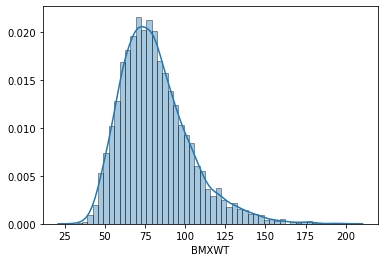

In [55]:
sns.distplot(df['BMXWT'].dropna(),hist_kws=dict(edgecolor='black'))

Next we look at the histogram of systolic blood pressure measurements. You can see that there is a tendency for the measurements to be rounded to the nearest 5 or 10 units


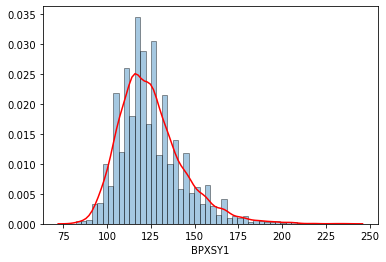

In [56]:
sns.distplot(df['BPXSY1'].dropna(),hist_kws=dict(edgecolor='black'),kde_kws=dict(color='red'))

side by side comparison of different blood pressures using box plot

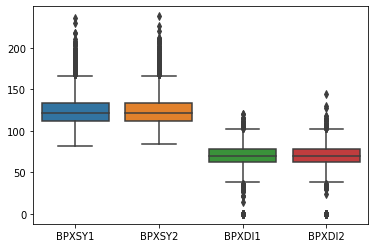

In [66]:
sns.boxplot(data=df.loc[:, ["BPXSY1", "BPXSY2", "BPXDI1", "BPXDI2"]])


# STRATIFICATION

In [67]:
df['RIDAGEYR'].describe()

count    5735.000000
mean       48.052310
std        18.431011
min        18.000000
25%        32.000000
50%        48.000000
75%        63.000000
max        80.000000
Name: RIDAGEYR, dtype: float64

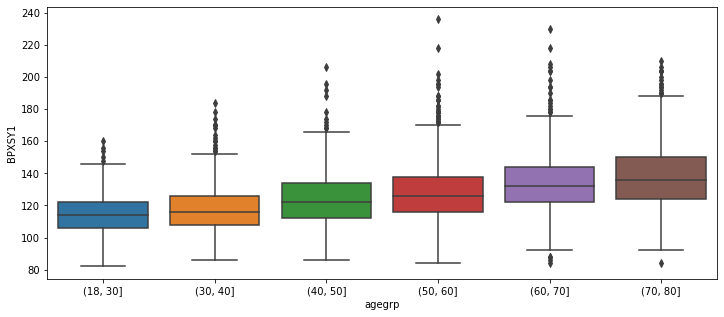

In [70]:
df['agegrp']= pd.cut(df['RIDAGEYR'],[18,30,40,50,60,70,80])
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp',y='BPXSY1',data=df)

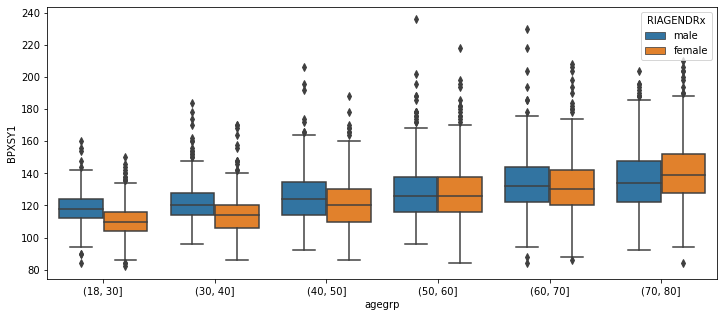

In [72]:
plt.figure(figsize=(12,5))
sns.boxplot(x='agegrp',y='BPXSY1',hue='RIAGENDRx',data=df)

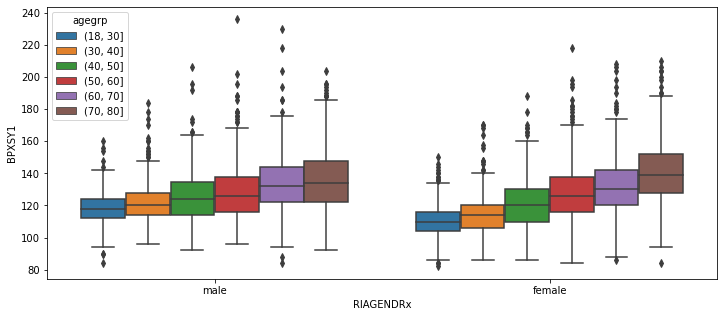

In [73]:
plt.figure(figsize=(12,5))
sns.boxplot(x='RIAGENDRx',y='BPXSY1',hue='agegrp',data=df)